### 기초통계

- 기술통계지표

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
r = np.random.normal(0,4)*10 #(평균, 분산)
r

-51.88764068095196

In [3]:
ri = int(r)
ri

-51

In [4]:
# 데이터 100개 임의로 만들기
res = []
for i in range(100):
    r = np.random.normal(0,5) *10
    res.append(int(r))
res[:10]

[-93, -28, -82, -46, -16, 13, 0, 24, 76, -22]

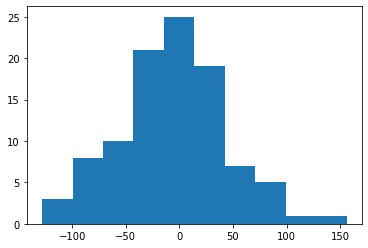

In [5]:
# 결과 히스토그램으로 보기
plt.hist(res)
plt.show()

In [6]:
ys = np.random.normal(0,1,1000) #(평균, 분산, 개수)
len(ys)

1000

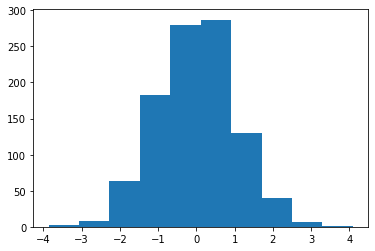

In [7]:
# 개수가 많아지면 정규분포표처럼 보인다(종모양)
plt.hist(ys)
plt.show()

In [10]:
# 평균
rmean = np.mean(res)

# 중앙값
rmedian = np.median(res)

# 사분위수
q1 = np.percentile(res,25)
q2 = np.percentile(res,50)
q3 = np.percentile(res,75)

# 분산
var = np.var(res)

# 표준편차
std = np.std(res)
[rmean,rmedian,q1,q2,q3,var,std]

[-5.99, -7.0, -33.75, -7.0, 23.25, 2443.0899000000004, 49.42762284391189]

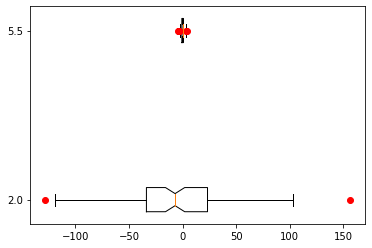

In [23]:
# boxplot 그리기
fig,ax = plt.subplots()
# notch = 중위값 강조, vert = 회전, sym = 극단치
ax.boxplot([res,ys],positions=[2,5.5],notch=1,vert=0,sym='ro')
plt.show()

#### 선형회귀 4가지 기본가정
1. 선형성
2. 독립성(이전에 값에 영향을 받지 않는다.)
3. 등분산성(분산이 선 주위로 오차가 일정해야 한다., 고르게 분포한다.)
4. 정규성(잔차의 정규성 -> 오차항들이 정규분포하는가)

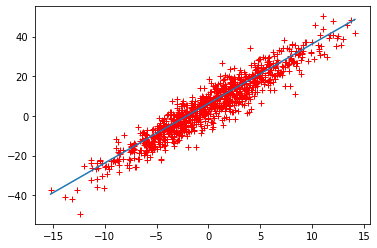

In [30]:
# 선형 회귀 만족하는 가상 데이터 만들기
a = 3 #기본 테스트 기울기
b = 5 #기본 테스트 절편
xs = np.random.normal(0,5,1000)
minx = np.min(xs)
miny = a*minx+b+e
maxx = np.max(xs)
maxy = a*maxx+b+e

ys = []
data = []
for x in xs:
    e = np.random.normal(0,5) #(평균,분산) ->분산값을 조정해서 선형회귀선 만드는 최적의 숫자 찾아라!
    y = a*x+b+e
    ys.append(y)
    data.append((x,y))
    
plt.plot(xs,ys,'r+')
plt.plot([minx,maxx],[miny,maxy])
plt.show()

In [33]:
#data=[(x,y)]
def makeMSE(a,b,data):
    temp=[]
    elist=[] #에러 리스트
    for dx,dy in data:
        yh = a*dx+b
        e = (yh-dy)**2 #yh-dy : 잔차
        elist.append(e)
    mse = np.sum(elist)/len(data)
    return mse

    #mse = sum(np.mean(yh-yc)**2)/len(y)

In [34]:
mse = makeMSE(2,3,data)
mse

51.46823995338266

In [35]:
mse = makeMSE(2.1,3,data) #기울기 높였더니 mse 값 줄어들었다.
mse
# ... 기울기 높이는 것이 올바른 방향으로 가는 것임을 알 수 있음

47.032399725064735

In [51]:
def nextMSE(a,b,data,lr=0.1): #lr=러닝레이트
    beforemse = makeMSE(a,b,data) 
    aftermse = makeMSE(a+lr,b,data)
    if(aftermse<beforemse):
        return aftermse+lr
    else:
        return aftermse-lr

In [54]:
res_a = []
a=2
b=3
for i in range(5): #계속 반복해서 돌도록 주기
    a = nextMSE(a,b,data)
    res_a.append(a)

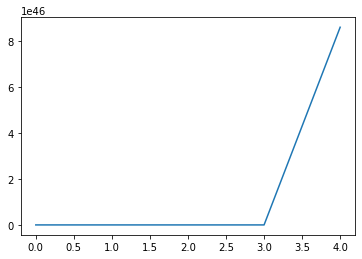

In [55]:
plt.plot(res_a)